# Data Science Africa
## Data Visualisation Practical Session

<div align="right"><font face="monospace" size="4">
    <br/>
    <strong>Morine</strong> Amutorine -- morine.amutorine@one.un.org <br/>
    <strong>Elaine</strong> Nsoesie -- onelaine@bu.edu <br/>
    <strong>Lehel</strong> Csató -- lehel.csato@cs.ubbcluj.ro
    </font></div>

> We assume that <br/>
> **[Anaconda](https://www.anaconda.com)** <br>
> is available (downloaded and installed) on your system.

Alternatively, if you have a form of Python and Matplotlib and Pandas and Numpy and Cartopy ;-) , it suffices.

From within anaconda will will be using the<br>
1. *jupyter* interface and 
1. *matplotlib*

This is a **scripting** interface for Python that is helpful for exploratory data analysis.

You can 
1. edit the notebook by simply entering commands and
1. press SHIFT-ENTER or CTRL-ENTER to evaluate the cell within the notebook

> Observe that the evaluation of the cells might not be linear, _but_ the variables are created when a cell is evaluated, therefore the internal state of the notebook **is** linear -- rflecting the **order** in which cells were evaluated.

In [1]:
%matplotlib notebook
#other options: inline
import matplotlib.pyplot as plt
import numpy as np
# press SHIFT-ENTER or CTRL-ENTER

In the above cell we initialised the *pyplot* interface and numpy (for the random number generation)

<IPython.core.display.Javascript object>


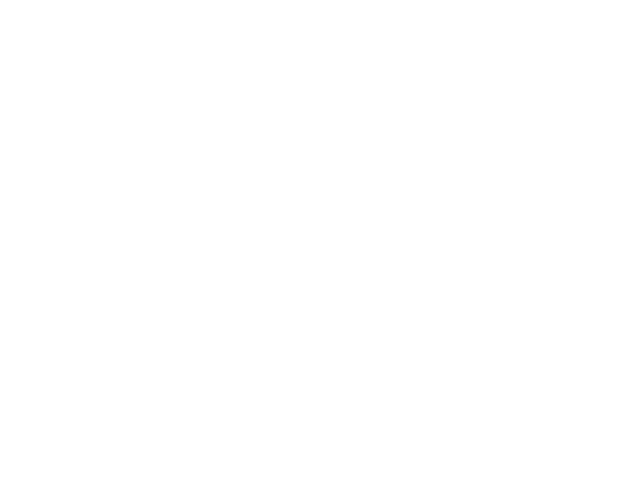

In [2]:
x = np.random.randn(10000)
plt.hist(x,100)
plt.title('Normal distribution with $\mu=0, \sigma=1$')
# plt.savefig('histogram2.pdf') # this is if we want to save to an image
plt.show()

In [3]:
# We can modify the figure as long as it is active.
# ALL *PLT* commands from the PYPLOT interface modify the
# *active* figure (if none is active, the figure is created)
plt.title('Histogram of $1000$ points from $N(0,1)$ in $100$ bins')

Text(0.5,1,'Histogram of $1000$ points from $N(0,1)$ in $100$ bins')

In [4]:
# we are using the PANDA dataframe library
import pandas as pd
from __future__ import print_function # for compatibility
!pwd
# the above command is to test the current working directory

'pwd' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
df_gdp = pd.read_excel(
  'data/countries_gdp.xls',
  sheet_name = 'Data', skiprows = range(3))
# Reading in other data
df_pop         = pd.read_excel('data/countries_population.xls',sheet_name = 'Data',skiprows = range(3))
df_edu_percent = pd.read_excel('data/countries_edu_percent.xls',sheet_name = 'Data',skiprows = range(3))
df_primary_014 = pd.read_excel('data/countries_primary_pupils_014.xls',sheet_name = 'Data',skiprows = range(3))
df_pupils_014  = pd.read_excel('data/countries_pupils_014.xls',sheet_name = 'Data',skiprows = range(3))

# We want to have selected countries, therefore creating indices for the four data-sets
df_gdp.set_index("Country Name", inplace=True)
df_pop.set_index("Country Name", inplace=True)
df_edu_percent.set_index("Country Name", inplace=True)
df_primary_014.set_index("Country Name", inplace=True)
df_pupils_014.set_index("Country Name", inplace=True)
#
#!! the making of indices is irreversible, doable only ONCE
#!! error if done multiple times

# we can confirm the importing -- HERE works
# df_gdp.head()

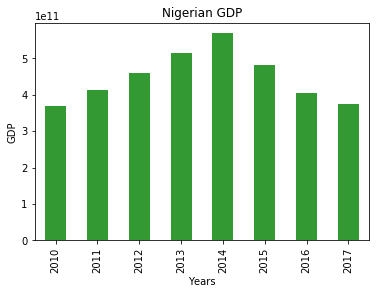

In [6]:
years = list( map( str, range(2010,2018)))

# we might try LINE ...
%matplotlib inline
df_gdp.loc['Nigeria', years].plot(kind='bar',color=(.2,.6,.2))
plt.title("Nigerian GDP")
plt.xlabel('Years')
plt.ylabel('GDP')
plt.xticks(list(range(0,8)), years)
plt.show()

## Visualising comparisons

The aim is to make a visualisation of multiple data items:
1. there were the years, but
1. we also want to plot on the same plot different coutries from the "neighbourhood" <br/>
  Cameroon, Tanzania, Niger, ...

In [7]:
# declaring data for our data visualisation:
# we are interested only in a small set of countries
#
# this is a dictionary having COUNTRY names as KEYS,
# and COLOR codes as attribute
#
colors = {
    "Nigeria": (0,1,1),
    "Niger":   (.4,.4,0),
    "Uganda":  (0, .7,.3),
    "Rwanda":  (.3,.5,.8),
    "Central African Republic": (.2,.3,.4),
    "Republic of the Congo": (.2,.1,.4),
    "Gabon":  (.5,.2,.7),
    "Somalia":  (.1,.8,.3),
    "Kenya":   (.3,.1,.8),
    "Sudan":   (.2,.0,.9),
    "Chad":    (.6,.2,.3),
    "Ethiopia":(.3,.7,.5),
    "South Sudan":(.2,.9,.8),
    "Cameroon":(.3,.7,.3),
    "Democratic Republic of the Congo": (.1,.3,0),
    "Tanzania": (.4,.1,0),
    "Burundi": (.5,0,.8)
}
# for further processing, we will need the names of
# COUTRIES
country_names = [k for k in colors.keys()]

## Highlight important data: GPD for a specific country

In [8]:
# Exercise
# Plot the GDP-s for all coutries in the list


# HIGHLIGHT your contry's GDP



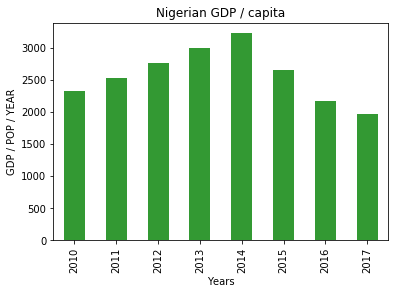

In [9]:
temp1=df_gdp.loc["Nigeria",years]
temp2=df_pop.loc["Nigeria",years]
type(temp2)
joined_data = temp1.div(temp2)

joined_data.plot(kind='bar',color=(.2,.6,.2))
plt.title("Nigerian GDP / capita")
plt.xlabel('Years')
plt.ylabel('GDP / POP / YEAR')
plt.xticks(list(range(0,8)), years)
plt.show()

## What abou comparison between coutries of interest

In [10]:
# Exercise
# Plot the GDP-s per capita for all coutries in the list


# HIGHLIGHT your contry's GDP



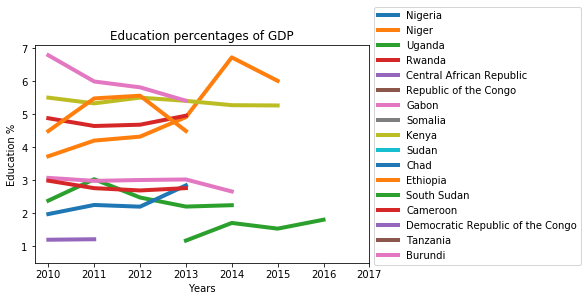

In [11]:
# Solved exercise:
#   plot the percent of education for the list of countries

for c_name in country_names:
    df_edu_percent.loc[c_name, years].plot(kind='line',linewidth=4)
# end for

plt.legend(country_names,loc='upper left', bbox_to_anchor=(1, 1.2))
plt.xlabel('Years')
plt.ylabel('Education %')
plt.title("Education percentages of GDP")
plt.xticks(list(range(0,8)), years)
plt.show()

In [12]:
years

['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']

## Putting things on a map

In [14]:
import cartopy.io.shapereader as shp_reader
import cartopy.crs as ccrs
import cartopy as cartopy
from matplotlib.figure import Figure  # the Figure artist
import numpy as np

# changing the way PLOTTING works
%matplotlib inline

In [15]:
# reading in the data
shp_file_name = shp_reader.natural_earth(resolution='110m',
                                      category='cultural',
                                      name='admin_0_countries')
reader = shp_reader.Reader(shp_file_name)
countries = [country for country in reader.records()]


C:\Users\oluwatobiloba\Anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


In [16]:
# we define the function we want to be used
# HELPER function to restrict the DATA
def filter_country_attr_values(country_list, attr_name, attr_list):
    result = []
    for country in country_list:
        for attr_value in attr_list:
            if country.attributes[attr_name] == attr_value:
                result.append(country)
    return result
# end filter_country_attr_values

small_list = filter_country_attr_values(
    countries, # the large data list
    'NAME_EN', # the attribute to use
    country_names # the list of attribute values
)

In [17]:
len(small_list)

17

C:\Users\oluwatobiloba\Anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
C:\Users\oluwatobiloba\Anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


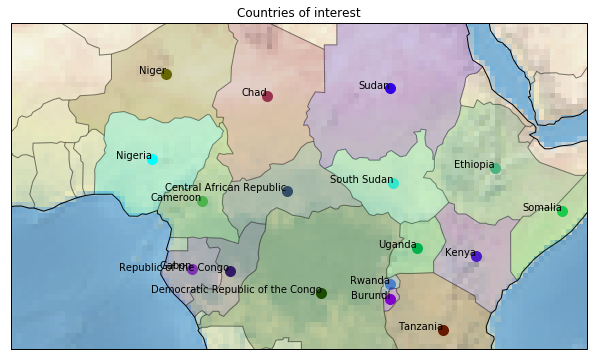

In [18]:
# visualisation source: 
# https://gis.stackexchange.com/questions/88209/python-mapping-in-matplotlib-cartopy-color-one-country

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=.5)
ax.add_feature(cartopy.feature.COASTLINE)
for cs in small_list:
    cs_col = colors[cs.attributes['NAME_EN']]
    ax.add_geometries(cs.geometry, ccrs.PlateCarree(),
                     facecolor = cs_col, alpha=0.2,
                     label = cs.attributes['NAME_EN'])
    (lon,lat) = cs.geometry.centroid.coords[0]
    plt.text(lon,lat,cs.attributes['NAME_EN'],horizontalalignment='right',transform=ccrs.PlateCarree())
    plt.scatter(lon,lat,marker='o',s=100,c=cs_col)
ax.set_extent([-5, 48, -8, 22], crs=ccrs.PlateCarree())
plt.title("Countries of interest")
plt.show()

In [19]:
# Exercise:
# Put on the MAP the GDP, the PERCENTAGE of pupils that go to school in primary
?plt.angle_spectrum